# Tangram preparation for Canva
- Take a pdf file from the Twinkl (https://www.twinkl.co.uk/)
- Split a pdf into images
- Remove top and bottom parts
- Turn into black and white
- Save images

In [ ]:
import fitz
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2

input_pdf = "data/animals.pdf"
img_folder = "res/animals/"
img_folder_bw = "res/animalsBW/"

In [ ]:
def pdf_to_images(pdf_path, output_dir, fmt='jpg'):
    """Converts a PDF to images.

    Args:
        pdf_path: Path to the PDF file.
        output_dir: Output directory for the images.
        fmt: Image format (default: 'jpg').
    """

    doc = fitz.open(pdf_path)
    os.makedirs(output_dir, exist_ok=True)
    for page in doc:
        pix = page.get_pixmap()
        output_path = f"{output_dir}page_{page.number}.{fmt}"
        pix.save(output_path)

    doc.close()
pdf_to_images(input_pdf, img_folder)

Count of images: 17


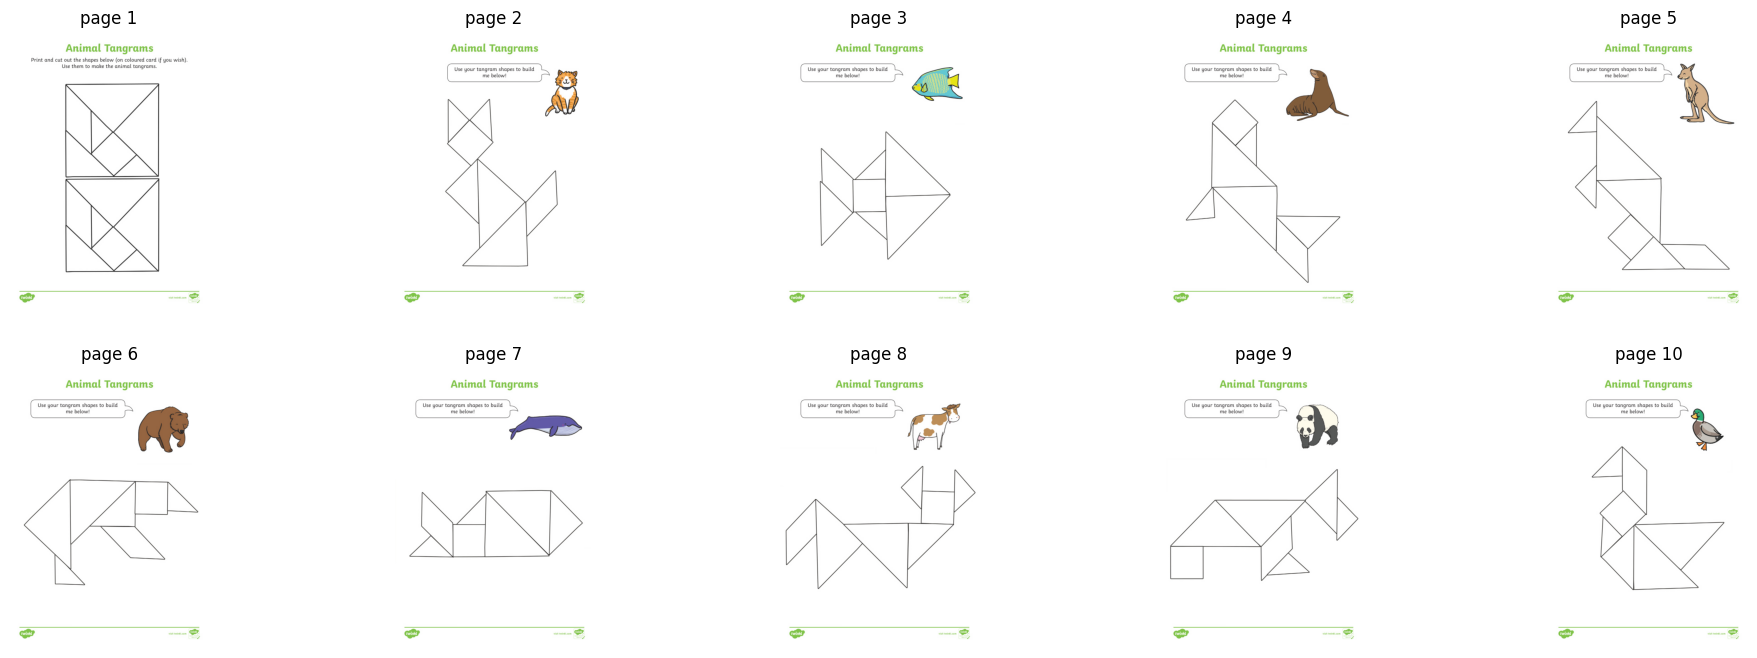

In [32]:
def plot_images(imgs, names = None, cols = 3, with_hist = False):
    n = len(imgs)
    if names is None:
        names = ["Image " + str(x) for x in range(n)]
    rows = int(np.ceil(n / cols))
    k = 2 if with_hist else 1
    fig, axs = plt.subplots(k * rows, cols, figsize=(24, 4 * k * rows))
    for ax in axs.ravel(): # remove axis from all canvas
        ax.axis("off")
    for i, img in enumerate(imgs):
        if with_hist:
            ax = axs[k * (i // cols) + 1, i % cols]
            ax.hist(img.ravel())
        ax = axs[k * (i // cols), i % cols]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(names[i])
        
import glob   
def read_imgs(imdir):
    ext = ['jpg', 'png']    # Add image formats here
    files = []
    [files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
    imgs = [cv2.imread(file) for file in files]
    print('Count of images:', len(imgs))
    return imgs
        
imgs = read_imgs(img_folder)
names = ['page ' + str(i + 1) for i in range(len(imgs))]
plot_images(imgs[:10], names[:10], 5) # Show first 10

In [33]:
# Parameters selection utility
def init_trackbars(param_dict, win_name):
    def nothing(x):
        pass
    # Create trackbars
    for param in param_dict:
        min_val, max_val, default_val = param_dict[param]
        cv2.createTrackbar(param, win_name, min_val, max_val, nothing)
        cv2.setTrackbarPos(param, win_name, default_val)
        
def param_selection(image, param_dict, func):
    # Create a window
    win_name = 'image'
    cv2.namedWindow(win_name)
        
    init_trackbars(param_dict, win_name)

    previous_param_values = np.zeros(len(param_dict), dtype=np.int32)
    current_param_values = np.zeros(len(param_dict), dtype=np.int32)
    
    while(1):
        # Get current parameter values
        current_param_values = [cv2.getTrackbarPos(param, win_name) for param in param_dict.keys()]

        # Check for parameter changes
        if not np.array_equal(previous_param_values, current_param_values):
            result = func(image, current_param_values)  # Apply changes
            param_str = ", ".join(f"{param}={value}" for param, value in zip(param_dict.keys(), current_param_values))
            print(param_str)
            previous_param_values = current_param_values.copy()

        # Display result image
        cv2.imshow(win_name, result)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cv2.destroyWindow("image")
    cv2.destroyAllWindows()

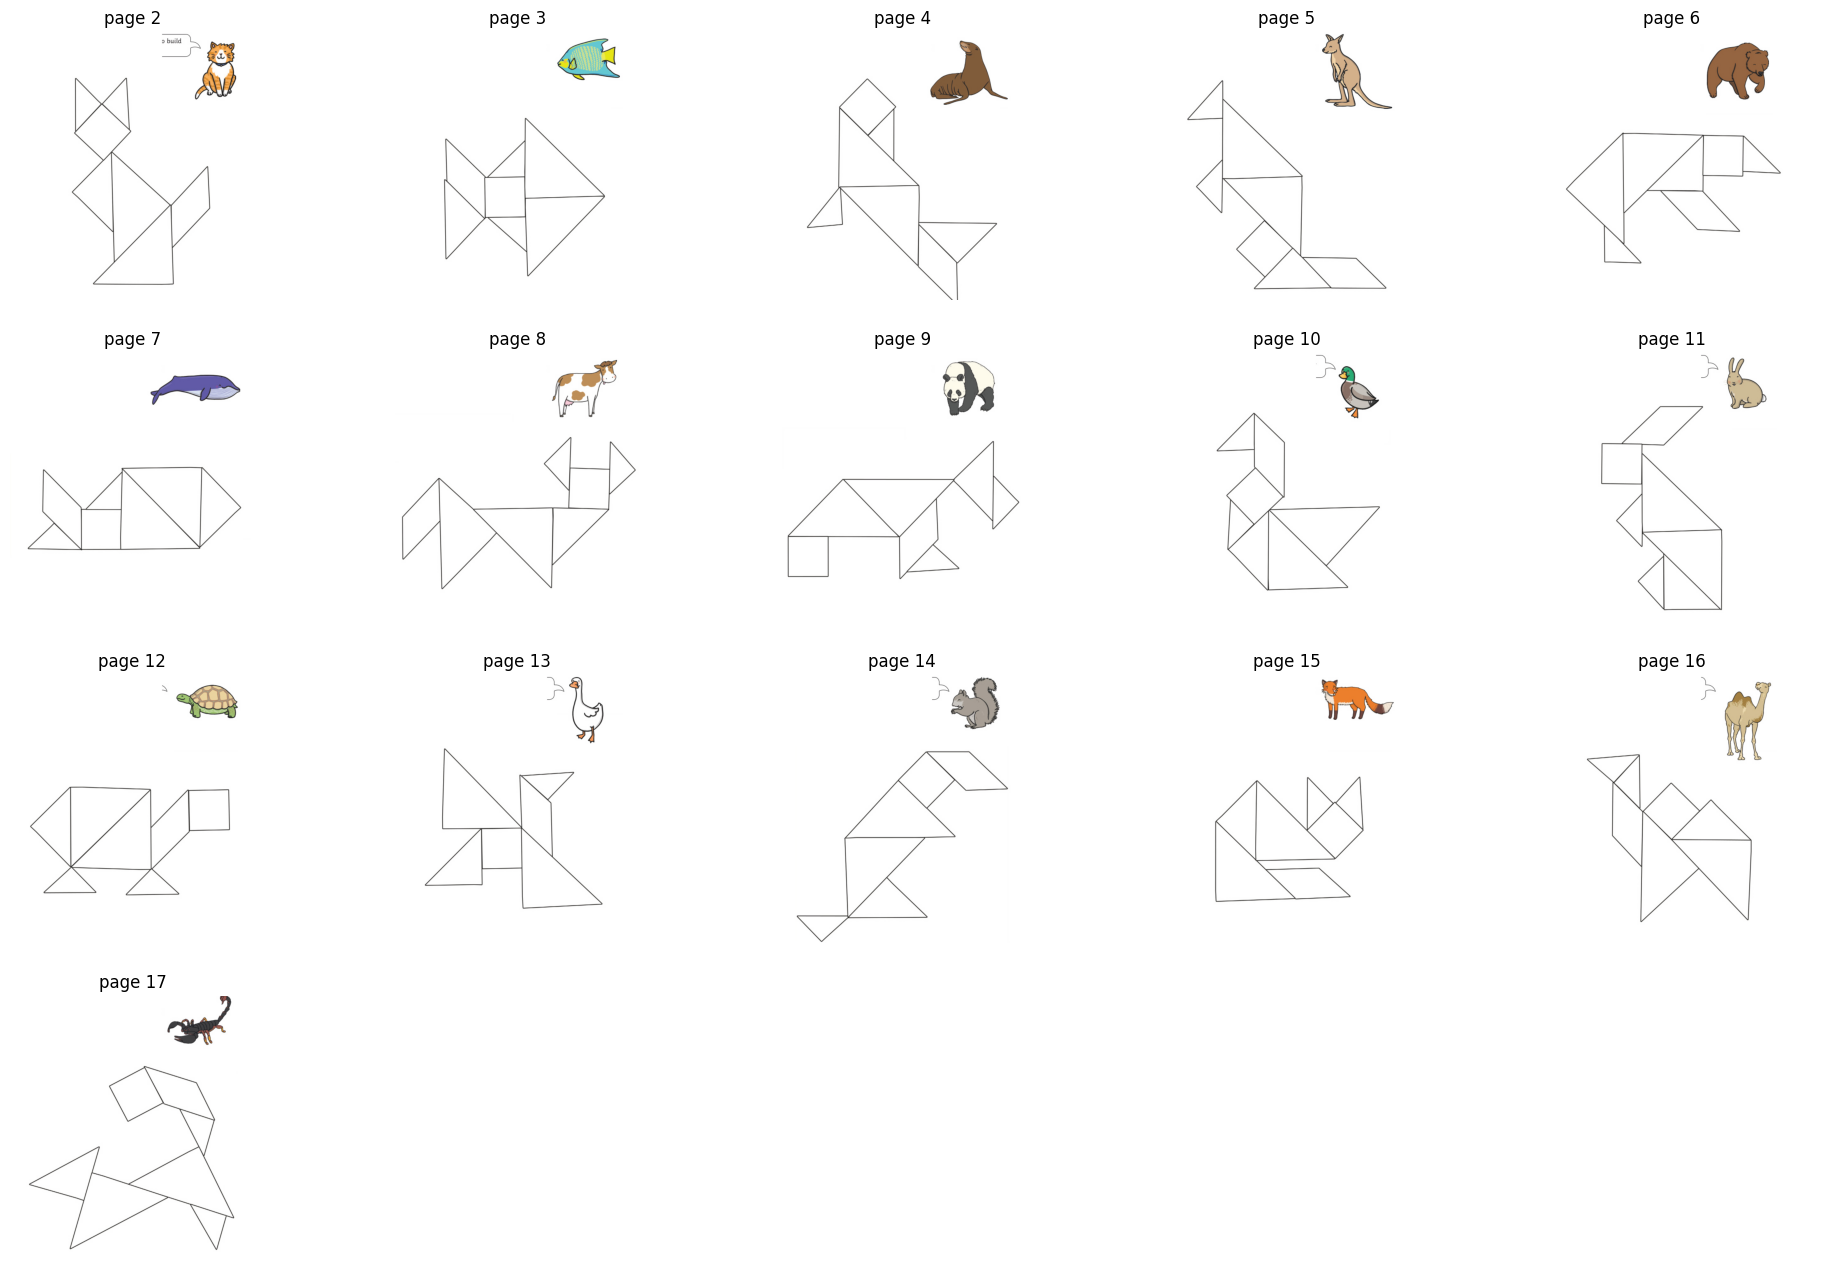

In [34]:
imgs = imgs[1:]
names = names[1:]
def cut(img):
    img = img.copy()
    img = img[90:-100, :]
    img[:80, :370] = 255
    return img
imgs1 = [cut(img) for img in imgs]
plot_images(imgs1, names, 5)

In [27]:
img = imgs[16].copy()
d = {'Thresh_half': (7, 10, 7), 'Thresh_diam': (2, 105, 55)}
def threshFunc(img, vals):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 2 * vals[0] + 1, vals[1])
    return img
param_selection(img, d, threshFunc)

Thresh_half=7, Thresh_diam=55
Thresh_half=9, Thresh_diam=55
Thresh_half=8, Thresh_diam=55
Thresh_half=7, Thresh_diam=55
Thresh_half=6, Thresh_diam=55
Thresh_half=5, Thresh_diam=55
Thresh_half=4, Thresh_diam=55
Thresh_half=3, Thresh_diam=55
Thresh_half=4, Thresh_diam=55
Thresh_half=3, Thresh_diam=55
Thresh_half=2, Thresh_diam=55
Thresh_half=1, Thresh_diam=55
Thresh_half=2, Thresh_diam=55
Thresh_half=3, Thresh_diam=55
Thresh_half=4, Thresh_diam=55
Thresh_half=5, Thresh_diam=55
Thresh_half=6, Thresh_diam=55
Thresh_half=7, Thresh_diam=55
Thresh_half=8, Thresh_diam=55
Thresh_half=9, Thresh_diam=55
Thresh_half=10, Thresh_diam=55
Thresh_half=9, Thresh_diam=55
Thresh_half=8, Thresh_diam=55
Thresh_half=7, Thresh_diam=55
Thresh_half=6, Thresh_diam=55
Thresh_half=6, Thresh_diam=56
Thresh_half=6, Thresh_diam=57
Thresh_half=6, Thresh_diam=59
Thresh_half=6, Thresh_diam=61
Thresh_half=6, Thresh_diam=66
Thresh_half=6, Thresh_diam=68
Thresh_half=6, Thresh_diam=72
Thresh_half=6, Thresh_diam=77
Thresh_ha

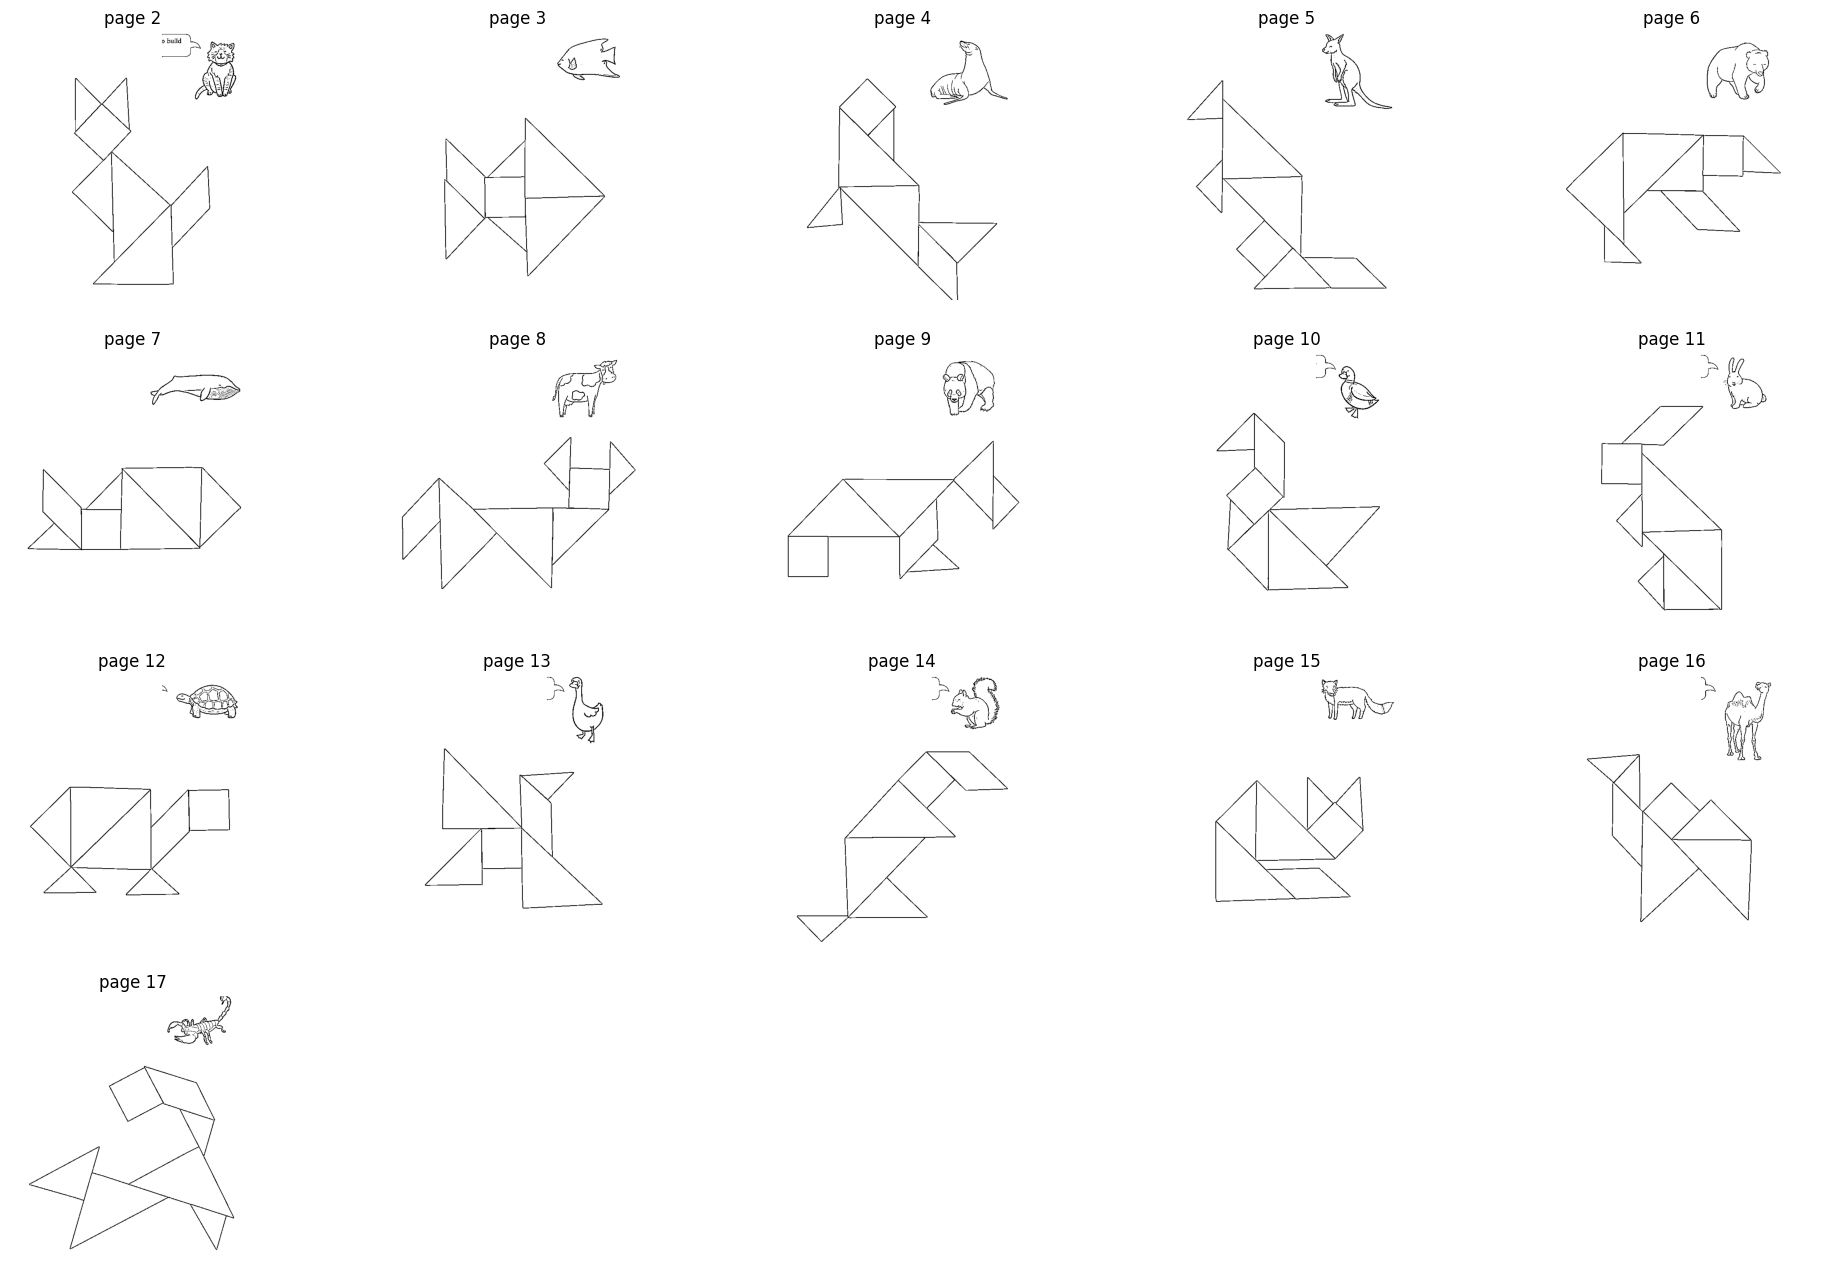

In [37]:
def thresh(img, vals):
    img = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 2 * vals[0] + 1, vals[1])
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img
vals = (7, 55)
vals = (2, 12)
imgs_res = [thresh(img, vals) for img in imgs1]
plot_images(imgs_res, names, 5)

In [48]:
res = [cv2.imwrite(f'{img_folder_bw}{name}.png', img) for img, name in zip(imgs_res, names)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]